### 1. Data Generation:
- Generate a synthetic dataset of 5000 customer records containing the following features:
1. CustomerID
2. Age
3. Gender
4. ContractType (Month-to-month, One year, Two year)
5. MonthlyCharges
6. TotalCharges
7. TechSupport
8. InternetService (DSL, Fiber optic, No)
9. Tenure
10. PaperlessBilling
11. PaymentMethod
12. Churn (Yes/No)

- Introduce realistic distributions, correlations, and outliers to the data.
- Ensure a target churn rate of approximately 20%.
- Create derived features like average_monthly_charges, customer_lifetime_value.

#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Set random seed for reproducibility
np.random.seed(40) #For getting the same random value generation every time , seed (40) has been specified.

In [3]:
# Number of records
Number_of_records = 5000

In [4]:
# Generate CustomerID
Customer_ID = np.arange(1, Number_of_records + 1)
# NumPy arange function generates an array of integers starting from start and stopping just before stop. 
# Since np.arange stops before the given stop value, adding 1 ensures that the last value in the array is included

In [5]:
# Generate Age with realistic distribution 

Age = np.clip(np.random.normal(40,10,Number_of_records),18,90).astype(int)

# clip function limit the values from 18 to 90
# random normal is used for specifying normal distribution
# mean is 40 and standard deviation is 10
# astype(int) so that age remains a whole number

Purpose:
- Mostly fall around 40 years old.
- Have some natural variability due to the standard deviation
- Are kept within a realistic and reasonable range (18 to 90 years old).

In [6]:
# Generate Gender 
Gender = np.random.choice(['Male','Female'],Number_of_records)

In [7]:
# Generate ContractType with given probabilities
Contract_Type = np.random.choice(['Month-to-month', 'One year', 'Two year'], Number_of_records, p=[0.45, 0.20, 0.35])

In [8]:
# Generate MonthlyCharges (normal distribution based on contract type in $ )
Monthly_Charges = []
for contract in Contract_Type:
    if contract == 'Month-to-month':
        Monthly_Charges.append(np.random.normal(60, 15))
    elif contract == 'One year':
        Monthly_Charges.append(np.random.normal(50, 10))
    else:  # Two year
        Monthly_Charges.append(np.random.normal(40, 5))

- monthly_charges[]:  initializes an empty list to store the monthly charges for each customer.
- for contract in contract_types: This loop iterates through each contract type in the contract_types list. The contract_types list contains the contract type for each customer.

Afterwards , we used conditionals to Set monthly charges based on Contract Type.

- monthly_charges.append: This appends the generated monthly charge to the monthly_charges list.

Purpose:
This generates realistic billing data for customers with different contract types. It reflects how customers with longer contracts generally pay less per month, likely as an incentive for commitment, and their charges are more predictable.

Normal Distribution Usage: Using different normal distributions for each contract type introduces realistic variability in the charges, reflecting how actual customer charges might vary slightly due to different plans, features, or usage.

In [9]:
# Generate Tenure Based on Contract Type
Tenure = []
for contract in Contract_Type:
    if contract == 'Month-to-month':
        # Random number of months between 1 and 59
        Tenure.append(np.random.randint(1, 60))
    elif contract == 'One year':
        # Generate random number of years between 1 and 2, then convert to months
        years = np.random.randint(1, 3)  # 1 or 2 years
        Tenure.append(years * 12)       # Convert years to months
    else:  # Two year
        # Generate random number of years between 2 and 4, then convert to months
        years = np.random.randint(2, 5)  # 2, 3, or 4 years
        Tenure.append(years * 12)       # Convert years to months

Representing tenure in months, rather than using both months and years, is often done for simplicity and consistency in data analysis.

1.  By using a single unit (months), all tenure values are represented in a consistent format, making it easier to analyze and compare data
2. Ease of Calculation.
3. More Accurate Reporting and Granularity:  Representing tenure in months allows for more precise reporting and tracking of customer lifecycle stages.
4. Retention Analysis: When analyzing customer retention, using months provides a more detailed understanding of when customers are likely to churn (example : around the 12-month mark).
5. Combining Data becomes easier.

In [10]:
# Generate TotalCharges (MonthlyCharges * Tenure)
Total_charges = np.array(Monthly_Charges) * np.array(Tenure)
Total_charges = np.round(Total_charges, 2)

Hence, total charges can be found out by monthly charges * the tenure of the customer

Second step involves the charges to be rounded off till 2 places

In [11]:
# Generate TechSupport (Yes/No)
Tech_Support = np.random.choice(['Yes', 'No'], Number_of_records, p=[0.4, 0.6])

Distributing Tech Support randomly with probability of YES as 0.4 and NO as 0.6

In [12]:
# Generate InternetService (DSL, Fiber optic, No) 
Internet_Service = np.random.choice(['DSL', 'Fiber optic', 'No'],Number_of_records, p=[0.23, 0.47, 0.3])

In [13]:
# Generate PaperlessBilling (Yes/No) 
Paperless_Billing = np.random.choice(['Yes', 'No'], Number_of_records, p=[0.7, 0.3])

In [14]:
# Generate PaymentMethod 
Payment_Methods = [
    'Electronic check', 
    'Mailed check', 
    'Bank transfer', 
    'Credit card', 
    'PayPal',           # Added Digital Wallet
    'Apple Pay',        # Added Mobile Payment
    'Google Pay',       # Added Mobile Payment
    'Cryptocurrency',   # Added Cryptocurrency option
    'Cash',             # Added Cash option
    'Wire Transfer',    # Added Wire Transfer option
    'Buy Now, Pay Later (BNPL)', # Added BNPL option
    'Gift Card'         # Added Prepaid Card option
]

# Generate payment methods for each record
Payment_Method = np.random.choice(Payment_Methods, Number_of_records)

In [15]:
# Generate Churn (Yes/No) with target churn rate of 20%
Churn = np.random.choice(['Yes', 'No'], Number_of_records, p=[0.2, 0.8])

#### Creating derived features: 
- average_monthly_charges 
- customer_lifetime_value

In [16]:
#average monthly charges
average_monthly_charges = Total_charges / np.where(Tenure == 0, 1, Tenure)

where tenure is by error 0, it will count tenure as 1 and continue. other than this, we we will get average monthly charge by simply dividing the total charges by tenure of the customer

In [17]:
# customer lifetime value
customer_lifetime_value = Total_charges * np.where(Churn == 'Yes', 1.5, 1)

Total value that customer has brought to company is the customer lifetime value. So, if the customer has churned i.e stayed in their agreement , we assume they brought 1.5 times the value. Otherwise, we simply multiply by 1 that is the original total charges value since customer has not churned.

In [18]:
# Create the DataFrame
data = pd.DataFrame({
    'CustomerID': Customer_ID,
    'Age': Age,
    'Gender': Gender,
    'ContractType': Contract_Type,
    'MonthlyCharges': np.round(Monthly_Charges, 2),
    'TotalCharges': Total_charges,
    'TechSupport': Tech_Support,
    'InternetService': Internet_Service,
    'Tenure': Tenure,
    'PaperlessBilling': Paperless_Billing,
    'PaymentMethod': Payment_Method,
    'AverageMonthlyCharges': np.round(average_monthly_charges, 2), #ROUNDING OFF TO 2
    'CustomerLifetimeValue': np.round(customer_lifetime_value, 2),
    'Churn': Churn
})

### Introduce data quality issues

We'll introduce missing values in 3% of the rows for 'Age', 5 % for 'TotalCharges', and 2% for'InternetService'

In [19]:
missing_age = np.random.choice(data.index, size=int(0.03 * Number_of_records), replace=False)
missing_totalcharges = np.random.choice(data.index, size=int(0.05 * Number_of_records), replace=False)
missing_internetservice = np.random.choice(data.index, size=int(0.02 * Number_of_records), replace=False)

data.loc[missing_age, 'Age'] = np.nan
data.loc[missing_totalcharges, 'TotalCharges'] = np.nan
data.loc[missing_internetservice, 'InternetService'] = np.nan

Introduce Outliers

In [20]:
# Introduce outliers in 'TotalCharges' (1% extreme values)
outliers = np.random.choice(data.index, size=int(0.01 * Number_of_records), replace=False)
data.loc[outliers, 'TotalCharges'] *= 3  # Triple the charges for outliers

In [21]:
# Data Volume: Reduce dataset size to simulate real-world constraints
# Keep only a subset of 2000 records
data_reduced = data.sample(n=3000, random_state=40).reset_index(drop=True)

Purpose: This part of the code randomly selects a subset of 3000 records from the original dataset data.

In [22]:
data_reduced.to_csv("CUSTOMER CHURN PREDICTION.csv")

### 2. Exploratory Data Analysis (EDA):
- Perform in-depth EDA to understand the dataset characteristics.
- Calculate summary statistics for numerical columns.
- Analyze categorical data distributions.
- Visualize relationships between features and the target variable (churn).
- Identify potential correlations and patterns.

Importing necessary libraries

In [23]:
import pandas as pd  
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt

In [24]:
# Reading the data file
data = pd.read_csv("CUSTOMER CHURN PREDICTION.csv")

In [25]:
# Reviewing the first 10 rows of the data
data.head(10)

,Unnamed: 0,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,AverageMonthlyCharges,CustomerLifetimeValue,Churn
0,0,4089,43.0,Male,Month-to-month,82.77,1655.37,Yes,No,20,No,Credit card,82.77,1655.37,No
1,1,2081,41.0,Female,One year,55.05,660.66,No,DSL,12,Yes,Gift Card,55.06,660.66,No
2,2,42,49.0,Female,Month-to-month,59.15,2188.63,No,DSL,37,No,"Buy Now, Pay Later (BNPL)",59.15,2188.63,No
3,3,797,40.0,Female,Two year,39.41,1891.63,Yes,Fiber optic,48,No,Cryptocurrency,39.41,1891.63,No
4,4,355,43.0,Female,Month-to-month,53.85,646.21,No,Fiber optic,12,Yes,Mailed check,53.85,646.21,No
5,5,4184,44.0,Female,Month-to-month,77.97,3430.47,No,No,44,Yes,"Buy Now, Pay Later (BNPL)",77.97,3430.47,No
6,6,4293,32.0,Male,Month-to-month,48.35,967.04,Yes,No,20,Yes,Apple Pay,48.35,967.04,No
7,7,2347,44.0,Female,Two year,48.23,1736.44,No,No,36,No,"Buy Now, Pay Later (BNPL)",48.23,1736.44,No
8,8,2765,40.0,Female,Month-to-month,53.86,2531.59,No,Fiber optic,47,Yes,Wire Transfer,53.86,2531.59,No
9,9,4950,51.0,Male,Two year,32.85,1182.70,No,No,36,Yes,Credit card,32.85,1182.70,No


In [26]:
# Checking out sum of all the null values column wise
data.isna().sum()

Unnamed: 0                 0
CustomerID                 0
Age                       79
Gender                     0
ContractType               0
MonthlyCharges             0
TotalCharges             151
TechSupport                0
InternetService           67
Tenure                     0
PaperlessBilling           0
PaymentMethod              0
AverageMonthlyCharges      0
CustomerLifetimeValue      0
Churn                      0
dtype: int64

In [27]:
# Reduced dataset from 5000 to 3000
data.shape 

(3000, 15)

#### Summary statistics

In [28]:
# Describing the data
data.describe()

,Unnamed: 0,CustomerID,Age,MonthlyCharges,TotalCharges,Tenure,AverageMonthlyCharges,CustomerLifetimeValue
count,3000.000000,3000.000000,2921.000000,3000.000000,2849.000000,3000.000000,3000.000000,3000.000000
mean,1499.500000,2502.353667,39.380349,50.878403,1516.668824,29.537333,50.878423,1628.573403
std,866.169729,1456.413337,9.739069,14.445109,1014.613218,14.467701,14.445102,1017.640553
min,0.000000,2.000000,18.000000,3.250000,38.870000,1.000000,3.250000,38.870000
25%,749.750000,1220.500000,33.000000,40.290000,853.440000,20.000000,40.290000,915.702500
50%,1499.500000,2527.500000,39.000000,47.705000,1332.750000,25.000000,47.705000,1438.810000
75%,2249.250000,3767.250000,46.000000,60.252500,1958.060000,41.000000,60.252500,2084.935000
max,2999.000000,5000.000000,74.000000,116.440000,13992.870000,59.000000,116.440000,6894.640000


In [29]:
# Analyze Categorical Data Distributions
Churn_distribution = data['Churn'].value_counts()
Churn_distribution

Churn
No     2388
Yes     612
Name: count, dtype: int64

We have 621 customers who have churned and 2379 who have not. 
(THE DATA IS IMBALANCED)

In [30]:
# Check gender distribution
Gender_distribution = data["Gender"].value_counts()
Gender_distribution

Gender
Female    1527
Male      1473
Name: count, dtype: int64

We have 1527 female and 1473 male customers.

In [31]:
# Check contract type distribution
Contract_type_distribution = data['ContractType'].value_counts()
Contract_type_distribution

ContractType
Month-to-month    1362
Two year          1032
One year           606
Name: count, dtype: int64

#### Performing  Categorical Analysis on the number of people who's age is above the mean and below the mean.

In [32]:
mean_age = data["Age"].mean()
mean_age.astype(int) # since age is int type and not float

39

The mean age is 39.

In [33]:
# Check how many people are below and above mean age
Below_mean_age_count = data[data["Age"]<=39].shape[0]#including 39 and below
Above_mean_age_count = data[data["Age"]>39].shape[0]
Below_mean_age_count,Above_mean_age_count

(1485, 1436)

This gives us accurate count of ages above 39 & 39 and below ages.

To use value counts method, we have created a NEW CATEGORY that is AGE CATEGORY which describes above mean age or below mean age(includes 39)

we have used numpy where function , in which we distributed on the basis of condition of age in  data . All values in data less than MEAN AGE goes in 'BELOW MEAN AGE' and is showcased as the same in dataset. The other values goes in 'ABOVE MEAN AGE' respectedly.

As of now this includes the null values as well, since it counts all unique occurences. For this to be accurate, we need to remove all nulls values first. Thus the difference while we use shaped and null. Therefore, using shape is more reliable and efficient if nulls values are present.

#### Visualize relationships between features and the target variable (churn).

In [34]:
# To distinguish between chunks of data we set style as whitegrid
sns.set_style('whitegrid')

Age vs. Churn

C:\Users\princ\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\princ\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\princ\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\princ\AppData\Roaming\Python\Python310\sit

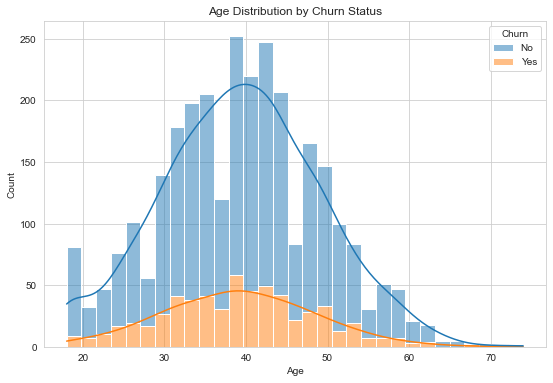

In [35]:
#USING HISTPLOT
plt.figure(figsize = (9,6)) # 9 inches in width and 6 inches in height
sns.histplot(data=data,x = 'Age',hue='Churn',multiple='stack',kde=True)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#since multiple = dodge gives us similar result as countplot we used stack. 

INSIGHT - The plot shows that most customers are aged between 30 and 50, with churn being relatively low in this group. Younger (under 30) and older (over 50) customers have a higher likelihood of churn, though they represent a smaller portion of the customer base.

x='Age': Specifies that the Age column from the dataset should be plotted on the x-axis

hue='Churn': Adds color differentiation based on the Churn column. This means that the histogram will be split into different colors representing different values of Churn


multiple='dodge': This argument specifies that the histogram bars for different Churn values should be stacked on top of each other. This helps to see the total count and the contribution of each category to the total

kde=True: Stands for Kernel Density Estimate. When it is set to True, it adds a KDE line over the histogram, which provides a smooth curve representing the distribution of the data

Total Charges vs. Churn

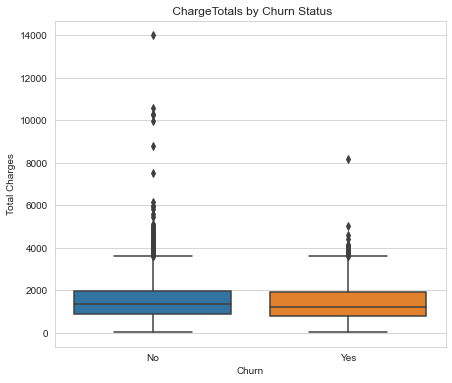

In [36]:
# USING BOXPLOT
plt.figure(figsize=(7, 6))
sns.boxplot(data=data, x='Churn', y='TotalCharges')
plt.title(' ChargeTotals by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

INSIGHT - This box plot shows that customers who churn ("Yes") and those who don't ("No") have similar distributions of total charges. Both groups have a median around $2,000, with a similar spread of charges. However, both groups also have a significant number of outliers with very high charges, indicating that total charges alone may not be a strong predictor of churn.

Internet Service vs. Churn

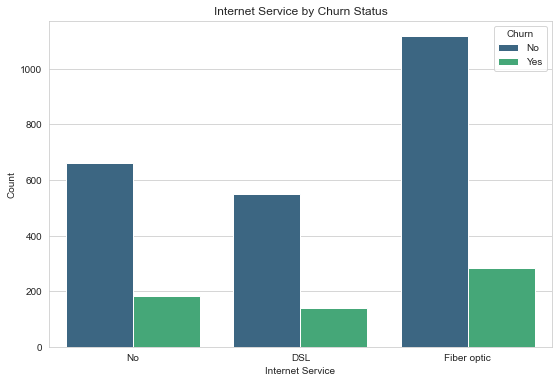

In [37]:
# USING COUNTPLOT
plt.figure(figsize=(9, 6))
sns.countplot(data=data, x='InternetService', hue='Churn',palette='viridis')
plt.title('Internet Service by Churn Status')
plt.xlabel('Internet Service')
plt.ylabel('Count') 
plt.show()

INSIGHT - This bar plot displays the relationship between internet service type and customer churn status. Here’s a concise insight:
- No Internet Service: The majority of customers who do not have internet service do not churn. Churn is minimal in this group.
- DSL Service: A notable portion of customers with DSL service do churn, but the majority still stay.
- Fiber Optic Service: Fiber optic service has the highest number of customers, but it also has a relatively high churn rate compared to DSL and no service.

Overall, customers with fiber optic service are more likely to churn than those with DSL or no internet service.

Monthly Charges vs. Churn

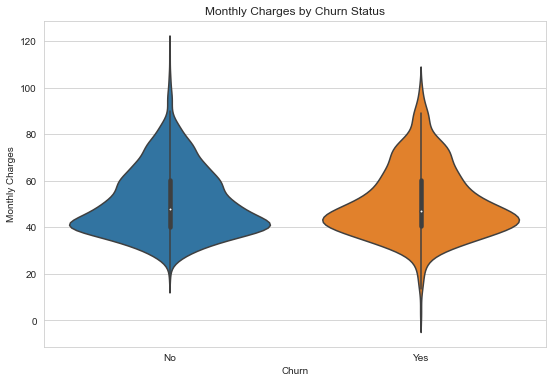

In [38]:
# VIOLIN PLOT

plt.figure(figsize=(9, 6))
sns.violinplot(data=data, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

# Violin Plot combines aspects of a box plot and a kernel density plot. It shows central tendency , dispersion and shape of the data distribution. 

INSIGHT - Customers with higher monthly charges show a slightly higher likelihood of churning, with similar distribution shapes for both churned and non-churned customers.

Identifying CORRELATIONS

In [39]:
correlation_matrix = data[['Age', 'MonthlyCharges', 'Tenure', 'TotalCharges']].corr() 
#taken all numeric values

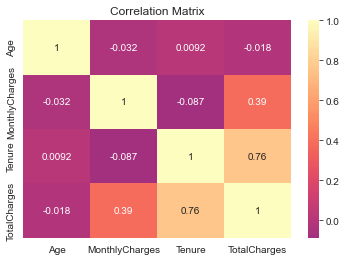

In [40]:
# Plotting the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', center=0) #specifying colour
plt.title('Correlation Matrix')
plt.show()

Heat map is a way to display correlation matrix

correlation_matrix: To visualize data in a typically a 2D matrix or DataFrame

annot=True: This instructs the heatmap to annotate each cell with the numeric value . It is the correleation coefficient. It displays the numbers directly on the cells, making it easier to interpret the exact values and compare relations between them

cmap=viridis: Specifies the color map used to color the cells. Different colors represent different ranges of values

center=0: Centers the colormap at zero to emphasize positive and negative correlations 

INSIGHTS - 
Age:

Correlation with MonthlyCharges: -0.028 (Very weak negative correlation)

Correlation with Tenure: -0.026 (Very weak negative correlation)

Correlation with TotalCharges: -0.031 (Very weak negative correlation)

Analysis: Age has very little correlation with MonthlyCharges, Tenure, or TotalCharges. This indicates that age does not significantly influence how much customers are charged monthly, how long they stay with the company, or the total amount they spend.

Monthly Charges:

Correlation with Age: -0.028 (Very weak negative correlation)

Correlation with Tenure: -0.087 (Weak negative correlation)

Correlation with Total Charges: 0.4 (Moderate positive correlation)

Analysis: Monthly Charges have a weak negative correlation with Tenure, suggesting that customers who have been with the company longer might pay slightly less on average. The moderate positive correlation with Total Charges indicates that customers who pay higher monthly fees also tend to have higher total charges, which makes sense since total charges accumulate over time with monthly payments.

Tenure:

Correlation with Age: -0.026 (Very weak negative correlation)

Correlation with MonthlyCharges: -0.087 (Weak negative correlation)

Correlation with TotalCharges: 0.79 (Strong positive correlation)

Analysis: Tenure shows a strong positive correlation with Total Charges, which is expected because customers who have been with the company for a longer time will have accumulated more charges. The weak negative correlation with Monthly Charges suggests that tenure does not significantly affect how much customers are charged on a monthly basis.

TotalCharges:

Correlation with Age: -0.031 (Very weak negative correlation)

Correlation with MonthlyCharges: 0.4 (Moderate positive correlation)

Correlation with Tenure: 0.79 (Strong positive correlation)

Analysis: Total Charges have a strong positive correlation with Tenure as mentioned. The moderate positive correlation with Monthly Charges implies that customers who pay more monthly also tend to have higher total charges, which aligns with the idea that higher monthly payments result in higher overall spending.

### 3. Data Preprocessing & 4. Feature Engineering:
- Handle missing values (if any) using appropriate techniques.
- Encode categorical features into numerical format.
- Split the dataset into training, validation, and testing sets.
- Consider techniques to handle imbalanced data (if necessary).

- Create additional features based on domain knowledge and EDA insights.
- Explore feature interactions and transformations.

In [41]:
# Handle missing values
# Importing necessary libraries
import pandas as pd  
from sklearn.impute import SimpleImputer

In [42]:
# Finding sum of missing values category wise.
data.isnull().sum()

Unnamed: 0                 0
CustomerID                 0
Age                       79
Gender                     0
ContractType               0
MonthlyCharges             0
TotalCharges             151
TechSupport                0
InternetService           67
Tenure                     0
PaperlessBilling           0
PaymentMethod              0
AverageMonthlyCharges      0
CustomerLifetimeValue      0
Churn                      0
dtype: int64

180 in Age, 286 in Total Charges, 125 in Internet Service

Method 1 : Imputing the missing numerical values with mean (includes age and total charges)

In [43]:
num_values_impute = SimpleImputer(strategy='mean')
data[['Age','TotalCharges']] = num_values_impute.fit_transform(data[['Age','TotalCharges']])
#returns dataframe with imputed values

Method 2 : Imputing Categorical missing values with Most Frequent Value (in this case , Internet Service missing values are imputed)

In [44]:
internetservice_impute = SimpleImputer(strategy='most_frequent')
data[['InternetService']] = internetservice_impute.fit_transform(data[['InternetService']])

Now,after imputing both numerical and categorical, let's check the sum of null values present.

In [45]:
data.isnull().sum()

Unnamed: 0               0
CustomerID               0
Age                      0
Gender                   0
ContractType             0
MonthlyCharges           0
TotalCharges             0
TechSupport              0
InternetService          0
Tenure                   0
PaperlessBilling         0
PaymentMethod            0
AverageMonthlyCharges    0
CustomerLifetimeValue    0
Churn                    0
dtype: int64

As, we can see all missing values have been imputed.

In [46]:
# Reviewing the data
data.head()

,Unnamed: 0,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,AverageMonthlyCharges,CustomerLifetimeValue,Churn
0,0,4089,43.0,Male,Month-to-month,82.77,1655.37,Yes,No,20,No,Credit card,82.77,1655.37,No
1,1,2081,41.0,Female,One year,55.05,660.66,No,DSL,12,Yes,Gift Card,55.06,660.66,No
2,2,42,49.0,Female,Month-to-month,59.15,2188.63,No,DSL,37,No,"Buy Now, Pay Later (BNPL)",59.15,2188.63,No
3,3,797,40.0,Female,Two year,39.41,1891.63,Yes,Fiber optic,48,No,Cryptocurrency,39.41,1891.63,No
4,4,355,43.0,Female,Month-to-month,53.85,646.21,No,Fiber optic,12,Yes,Mailed check,53.85,646.21,No


Now, We can see an extra unwanted column 'UNNAMED'

In [47]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [48]:
# Checking the number of catogorical columns and numerical columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             3000 non-null   int64  
 1   Age                    3000 non-null   float64
 2   Gender                 3000 non-null   object 
 3   ContractType           3000 non-null   object 
 4   MonthlyCharges         3000 non-null   float64
 5   TotalCharges           3000 non-null   float64
 6   TechSupport            3000 non-null   object 
 7   InternetService        3000 non-null   object 
 8   Tenure                 3000 non-null   int64  
 9   PaperlessBilling       3000 non-null   object 
 10  PaymentMethod          3000 non-null   object 
 11  AverageMonthlyCharges  3000 non-null   float64
 12  CustomerLifetimeValue  3000 non-null   float64
 13  Churn                  3000 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 328.2+ 

To use catogorical features in out model we can to encode Categorical Features into Numerical

In [49]:
# All categorical columns
Categorical_columns = ["Gender",'ContractType','TechSupport','InternetService','PaperlessBilling','PaymentMethod','Churn']

In [50]:
# Import necessary library for encoding
from sklearn.preprocessing import LabelEncoder

In [51]:
# Encoding churn column with label encoding
for col in Categorical_columns :
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col]) 

In [52]:
# Reviewing the encoded data
data.head()

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,AverageMonthlyCharges,CustomerLifetimeValue,Churn
0,4089,43.0,1,0,82.77,1655.37,1,2,20,0,4,82.77,1655.37,0
1,2081,41.0,0,1,55.05,660.66,0,0,12,1,7,55.06,660.66,0
2,42,49.0,0,0,59.15,2188.63,0,0,37,0,2,59.15,2188.63,0
3,797,40.0,0,2,39.41,1891.63,1,1,48,0,5,39.41,1891.63,0
4,355,43.0,0,0,53.85,646.21,0,1,12,1,9,53.85,646.21,0


Hence, now the categoricals are converted into numerical format.

In our dataset, we have "CUSTOMER_ID" feature, which doesn't play a major role in determining if an employee is going to churn or not, so we will drop this column as well

In [53]:
# Dropping the 'Customer_ID' column
data = data.drop(['CustomerID'], axis = 1)

In [54]:
# Reviewing the data
data.head()

,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,AverageMonthlyCharges,CustomerLifetimeValue,Churn
0,43.0,1,0,82.77,1655.37,1,2,20,0,4,82.77,1655.37,0
1,41.0,0,1,55.05,660.66,0,0,12,1,7,55.06,660.66,0
2,49.0,0,0,59.15,2188.63,0,0,37,0,2,59.15,2188.63,0
3,40.0,0,2,39.41,1891.63,1,1,48,0,5,39.41,1891.63,0
4,43.0,0,0,53.85,646.21,0,1,12,1,9,53.85,646.21,0


#### Split the Dataset into Training, Validation, and Testing Sets

Defining Features or the input variables used to make predictions under X.

The Target variable i.e 'churn' which the model will predict is the output variable. This is labelled under y

In [55]:
X = data.drop('Churn', axis = 1) 
# axis = 1 specifies churn is a column and not a row.
#for row we use, axis = 0

y = data['Churn']

Splitting into Training and Test Sets

In [56]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

Hence , dataset is split into 
1. training set which is 70 percent of dataset. 
2. test which has 30 percent of dataset

random_state is kept same so that every time same random split is reproduced.

In [57]:
print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')
# this shows us the distributed values.

Training set size: 2100
Test set size: 900


In [58]:
Churn_count = data['Churn'].value_counts()
print(Churn_count)

Churn
0    2388
1     612
Name: count, dtype: int64


Since the data is highly imbalanced in Churn feature.

Handling imbalanced data is crucial when building machine learning models, as it ensures that the model doesn't become biased towards the majority class and maintains good predictive performance for the minority class.

TECHNIQUE TO OVERCOME IMBALANCE : INCREASE MINORTY TO BALANCE DATASET USIN SMOTE TECHNIQUE

In [59]:
#importing SMOTE
from imblearn.over_sampling import SMOTE

imblearn (imbalanced-learn) is a Python package that provides tools for dealing with imbalanced datasets. One of its key features is SMOTE (Synthetic Minority Over-sampling Technique), which is used to balance datasets by generating synthetic samples for the minority class.

In [60]:
smote = SMOTE(random_state = 40)
X_train , y_train = smote.fit_resample(X_train,y_train)
print(pd.Series(y_train).value_counts())

Churn
0    1673
1    1673
Name: count, dtype: int64


Now, the training data balanced and we can use it for model training

### 5. Model Building:
- Experiment with various classification algorithms (Logistic Regression, Random Forest, Gradient Boosting, XGBoost, etc.).
- Optimize model hyperparameters using techniques like Grid Search or Randomized Search.
- Evaluate model performance using metrics like accuracy, precision, recall, F1-score, ROC curve, AUC.
- Consider ensemble methods for improved performance.

In [61]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [62]:
# Define the models to be tested
models = {
    'Logistic Regression' : LogisticRegression(),
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'XGBoost' : XGBClassifier()
}

#### Before the model building we need to normalize out training and test sets which will be done using Stadard Scaling
Standard scaling ensures all features have the same scale, improving model performance and preventing any one feature from dominating due to its range.

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
# Initializing a dictionary to store model performance 
model_performance = {}

In [65]:
# Iterate over models to train and evaluate
for name, model in models.items():
    # Train the model

    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    #Evaluating model perfomance 
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)

    #store performance
    model_performance[name] = {
        'Accuracy' :accuracy,
        'Precision': precision,
        'Recall' : recall,
        'F1 Score': f1,
        'AUC' : auc_score
    }

In [66]:
# Displaying model performance
performance_display = pd.DataFrame(model_performance).T
performance_display

,Accuracy,Precision,Recall,F1 Score,AUC
Logistic Regression,0.947778,0.855670,0.897297,0.875989,0.929068
Random Forest,0.935556,0.915033,0.756757,0.828402,0.869287
Gradient Boosting,0.974444,0.940217,0.935135,0.937669,0.959875
XGBoost,0.990000,0.978261,0.972973,0.975610,0.983689


As we can see, we are getting best accuracy,precision and recall with XGBoost CLassifier , hence we will perform Hyper parameter tuning for XGBoost.

In [67]:
#Define the XGBoost model
xgboost_model = XGBClassifier()

In [68]:
# Define the hyperparameter grid 

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

In [69]:
# Perform Randomized Search 
random_search = RandomizedSearchCV(
    estimator=xgboost_model,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42
)

# Fit the Randomized Search
random_search.fit(X_train, y_train)
print(random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] EN

In [70]:
best_xgb_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_xgb_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

# Print the performance metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC: {auc_score:.2f}')

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
F1 Score: 0.99
AUC: 0.99


By performing Hyperparameter Tuning of XGBoost , we managed to improve the overall metrics of the classifier

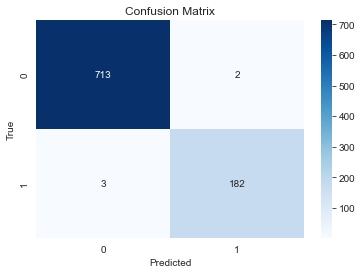

In [71]:
# Plotting Confusion Matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

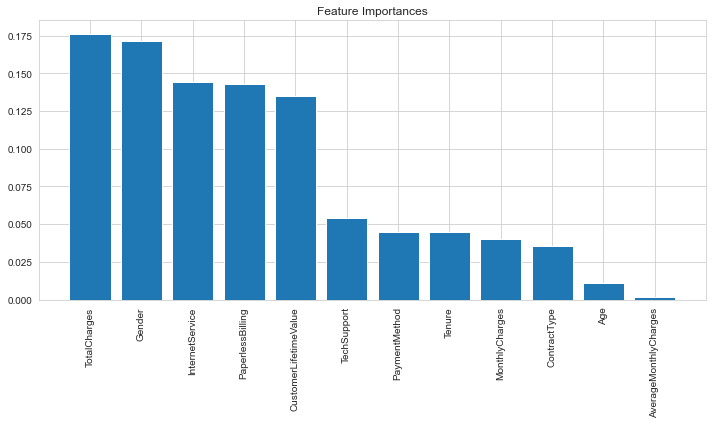

In [72]:
# Plotting Feature Importance
importances = best_xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

By performing training various models like Logistic Regression, Random Forest, Gradient Boosting, XGBoost. We found that XGBoost gives the best performance with the dataset with 99% (Accuracy) on the test dataset.

### But why did XGBoost Algorithm performed well?

1. Higher Accuracy
Advanced Tree Pruning: XGBoost uses a technique called "max depth pruning," which is more sophisticated than traditional tree pruning methods. This allows it to better manage the trade-off between model complexity and accuracy.
Handling Non-linearity: Unlike Logistic Regression, which is linear, XGBoost can model complex non-linear relationships, making it more suitable for datasets where such relationships are prevalent.

2. Efficiency
Parallel Processing: XGBoost is optimized for speed, employing parallel processing to build trees simultaneously, significantly reducing training time compared to traditional Random Forests and Gradient Boosting.
Hardware Optimization: It leverages advanced optimization techniques and hardware resources efficiently, making it faster even on large datasets
.
3. Regularization
L1 and L2 Regularization: XGBoost includes both L1 (Lasso) and L2 (Ridge) regularization, which helps in reducing overfitting. This is a significant improvement over traditional Gradient Boosting, which may overfit if not properly tuned.
Built-in Penalties: The algorithm applies penalties on large numbers of trees and complex models, making it more robust and less prone to overfitting compared to Random Forests, which may require manual tuning.

4. Scalability
Handling Large Datasets: XGBoost is designed to handle very large datasets, both in terms of the number of samples and features. It can efficiently process millions of examples, making it more scalable than traditional methods like Logistic Regression, which may struggle with high-dimensional data.
Sparse Data Handling: XGBoost is particularly effective in handling sparse data, which is common in many real-world scenarios, such as text classification.

5. Handling Missing Values
In-built Missing Value Treatment: Unlike many algorithms that require imputation of missing values, XGBoost can automatically learn the best direction to take when encountering missing data during the training process. This built-in capability improves its performance on datasets with incomplete data.

6. Flexibility
Custom Objective Functions: XGBoost allows for the customization of objective functions and evaluation metrics, providing greater flexibility to tune the model for specific problems, which is not as straightforward with Logistic Regression or Random Forest.
Boosting Variants: XGBoost supports various boosting variants like Dart and Rank, offering more options for specific types of data and tasks.

#### Dumping the model

In [73]:
# Save the model
import pickle
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(model, file)